Step 1: The Setup (Get the Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"

# 2. Define Column Names (The raw file does not have them)
column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
    'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
    'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'asianPerCap', 'otherPerCap', 'HispPerCap', 'NumUnderPov',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
    'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtF', 'MalePctDivorce',
    'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
    'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
    'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
    'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
    'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
    'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
    'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
    'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc',
    'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT',
    'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
    'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite',
    'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
    'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
    'LemasPctOfficDrugUn', 'ViolentCrimesPerPop'
]

# 3. Load Data & Handle Missing Values
# The dataset uses '?' for missing data. We convert that to NaN immediately.
df = pd.read_csv(url, names=column_names, na_values='?')

print("Data Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Data Loaded Successfully!
Rows: 1994, Columns: 123


Step 2: Clean the Mess

In [2]:
# 1. Drop the first 5 identification columns
df = df.drop(columns=['state', 'county', 'community', 'communityname', 'fold'])

# 2. Remove columns that are missing more than 30% of their data
missing_threshold = 0.3
df = df.loc[:, df.isnull().mean() < missing_threshold]

# 3. Fill remaining small missing gaps with the column mean
df = df.fillna(df.mean())

print(f"Cleaning Complete. New Shape: {df.shape}")

Cleaning Complete. New Shape: (1994, 96)


In [3]:
df.to_csv('communities_cleaned.csv', index=False)

from google.colab import files
files.download('communities_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 3: Understand the Target (EDA)

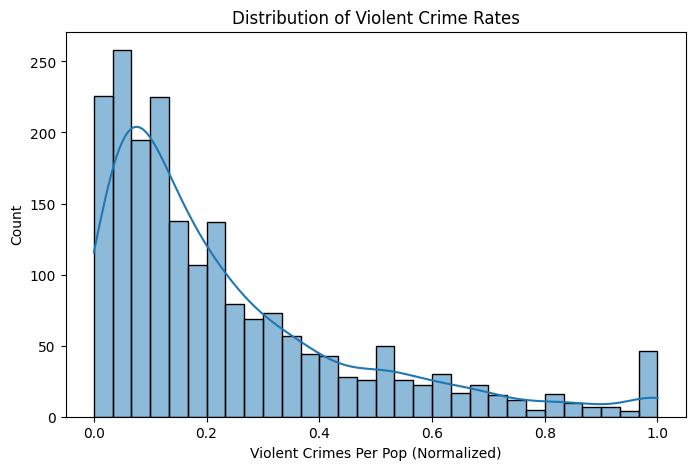

In [4]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['ViolentCrimesPerPop'], bins=30, kde=True)
plt.title('Distribution of Violent Crime Rates')
plt.xlabel('Violent Crimes Per Pop (Normalized)')
plt.show()

Step 4: Find the Drivers (Correlation)

In [5]:
# Find correlations with the target
correlations = df.corr()['ViolentCrimesPerPop'].sort_values(ascending=False)

print("Top 5 Factors Increasing Crime:")
print(correlations.head(6)) # Top 5 + the target itself

print("\nTop 5 Factors Decreasing Crime:")
print(correlations.tail(5))

Top 5 Factors Increasing Crime:
ViolentCrimesPerPop    1.000000
PctYoungKids2Par       0.737957
medIncome              0.574665
PctEmplProfServ        0.556032
PctOccupManu           0.552777
PctEmploy              0.525407
Name: ViolentCrimesPerPop, dtype: float64

Top 5 Factors Decreasing Crime:
numbUrban        -0.576324
TotalPctDiv      -0.661582
FemalePctDiv     -0.666059
MalePctDivorce   -0.706667
MalePctNevMarr   -0.738424
Name: ViolentCrimesPerPop, dtype: float64


Step 5: Build a Machine Learning Model

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate Features (X) and Target (y)
X = df.drop('ViolentCrimesPerPop', axis=1)
y = df['ViolentCrimesPerPop']

# 2. Split into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model (Fixed for your version)
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE first
rmse = np.sqrt(mse)                       # Manually take the square root
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score (Accuracy): {r2:.4f}")

Model Performance:
Root Mean Squared Error (RMSE): 0.1337
R^2 Score (Accuracy): 0.6269


Step 6: Visualize the Truth

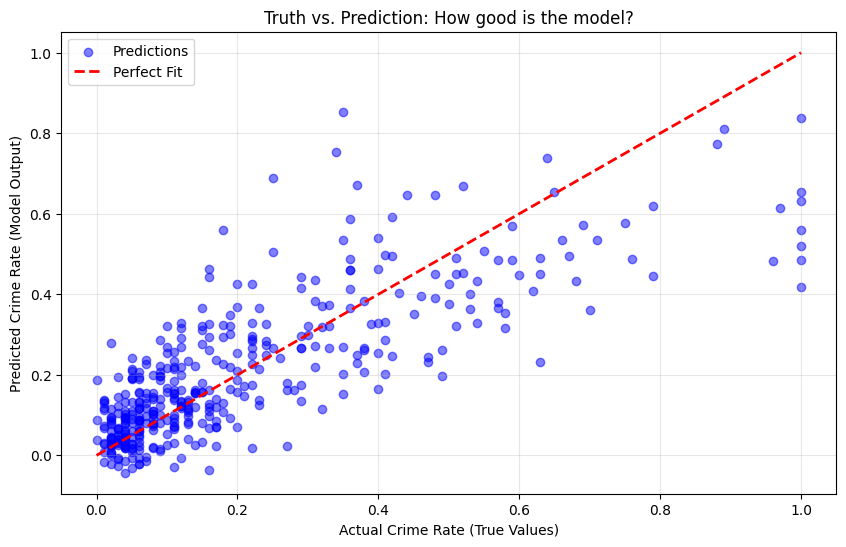

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')

# The "Perfect Prediction" Line (Red Dashed Line)
# If a dot falls on this line, the prediction was 100% correct.
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.xlabel('Actual Crime Rate (True Values)')
plt.ylabel('Predicted Crime Rate (Model Output)')
plt.title('Truth vs. Prediction: How good is the model?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Step 7: The Upgrade (Random Forest)

In [8]:
from sklearn.ensemble import RandomForestRegressor

# 1. Initialize the Random Forest model
# n_estimators=100 means we are building 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model (This might take 5-10 seconds)
rf_model.fit(X_train, y_train)

# 3. Make new predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("--- Random Forest Performance ---")
print(f"New RMSE: {rmse_rf:.4f} (Lower is better)")
print(f"New R^2 Score: {r2_rf:.4f} (Higher is better)")

--- Random Forest Performance ---
New RMSE: 0.1373 (Lower is better)
New R^2 Score: 0.6062 (Higher is better)


Step 8: The "Why" (Feature Importance)

/tmp/ipython-input-2416994913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


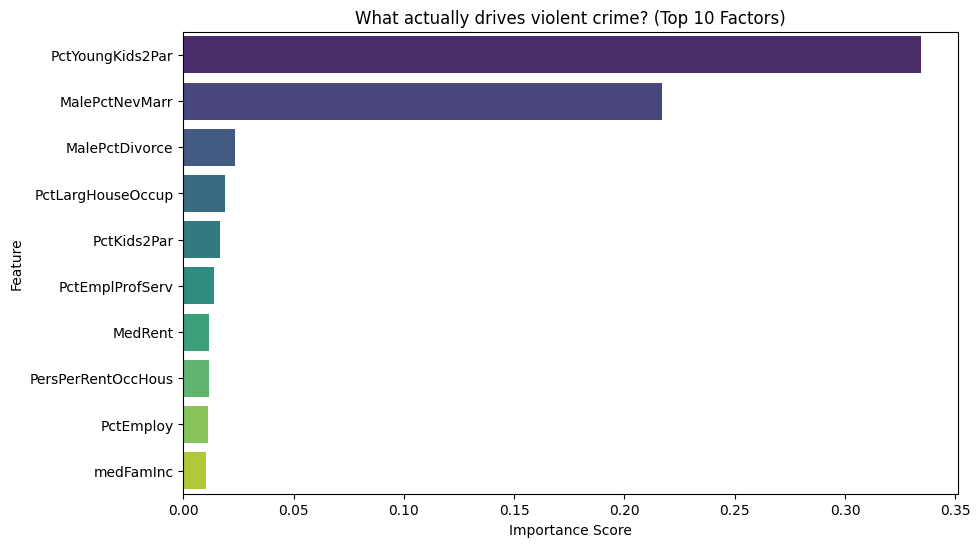

In [9]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to organize them
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('What actually drives violent crime? (Top 10 Factors)')
plt.xlabel('Importance Score')
plt.show()

In [10]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'crime_predictor_model.pkl')

print("Model saved! You can now deploy this to a website or app.")

Model saved! You can now deploy this to a website or app.


In [11]:
import joblib
import pandas as pd

# 1. Load the model from the file
loaded_model = joblib.load('crime_predictor_model.pkl')

# 2. Verify it loaded correctly
print("Model loaded successfully!")
print(f"Model Type: {type(loaded_model)}")

# 3. (Optional) Check the feature importance again to prove it's the same model
print("Feature Importances loaded:", loaded_model.feature_importances_[:5])

Model loaded successfully!
Model Type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Feature Importances loaded: [0.00578529 0.00333482 0.00227203 0.00206207 0.00322887]


Step 1: The "Magic Trick" (Test your saved model)

In [12]:
import joblib
import pandas as pd
import numpy as np

# 1. Load your saved model
loaded_model = joblib.load('crime_predictor_model.pkl')

# 2. Let's grab a random row from your data to act as a "New Community"
# (In real life, this data would come from a user filling out a form)
random_community = X_test.iloc[10:11]  # Taking the 10th row from our test data

# 3. Ask the model to predict
prediction = loaded_model.predict(random_community)

# 4. Display the result
print(f"--- Prediction Report ---")
print(f"Based on the socio-economic data provided:")
print(f"Predicted Violent Crime Rate: {prediction[0]:.4f}")
print(f"Actual Crime Rate (for comparison): {y_test.iloc[10]:.4f}")

--- Prediction Report ---
Based on the socio-economic data provided:
Predicted Violent Crime Rate: 0.4115
Actual Crime Rate (for comparison): 0.6300
